# Image Processing with Keras
Deep learning methods use data to train neural network algorithms to do a variety of machine learning tasks, such as classification of different classes of objects. Convolutional neural networks are deep learning algorithms that are particularly powerful for analysis of images. This course will teach you how to construct, train and evaluate convolutional neural networks. You will also learn how to improve their ability to learn from data, and how to interpret the results of the training.

**Instructor:** Ariel Rokem, Sr. Data Scientist at University of Washington

**NOTE:** Instructor did not make datasets used in exercises publicly available outside of DataCamp's IPython shell, and for this reason the data files have not been loaded in this notebook.

# $\star$ Chapter 1: Image Processing with Neural Networks
Convolutional neural networks use the data that is represented in images to learn. In this chapter, we will probe data in images, and we will learn how to use Keras to train a neural network to classify objects that appear in images.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#pip install scikit-image

## Introducing Convolutional Neural Networks (CNNs)
* CNNs are powerful algorithms for processing images; in fact, these algorithms are currently the best algorithms we have for automated processing of images and they are used by many different companies to do things like identifying the objects in an image
* **After completeing this course, you will be able to build an algorithm that processes images of different objects and can distinguish between them.** 

#### Software and pre-requisites
* DataCamp's Deep Learning course
* Machine learning concepts:
    * Overfitting
    * Model evaluation
    * Cross-validation
    
#### Images as data

```
data=plt.imread('stop_sign.jpg')
plt.imshow(data)
plt.show()
```
* Using `matplotlib`, you can import an image (data) into memory from a file and then display it using a plotting command (as shown above).
* **Color images are stored in 3-dimensional arrays**
    * The first two dimensions correspond to the height and width of the image (the number of pixels)
    * The third dimension corresponds to the red, green, and blue colors present in each pixel.
* When we index on both of the *spatial* dimensions (the first two dimensions), we can choose a pixel at a certain location in the image, for example, with: `data[1000, 1500]` 
    * Here row index is set to `1000` and column index is set to `1500`
* RGB dimension is ordered as the acronym is ordered: [0] red, [1] green, [2] blue

#### Modifying image data

```
data[:,:,1] = 0
data[:,:,2] = 0
plt.imshow(data)
plt.show()
```
* The result is an image that contains only the information in the red channel
* Could also more simply use: `data[:,:,0]`
*** 
* Alternatively, we could set all the pixels within some part of the image to have no red and no blue, but full intensity in the green channel.

```
data[200:1200, 200:1200, :] = [0,1,0]
plt.imshow(data)
plt.show()
```

In [2]:
coffee_image = data.coffee()

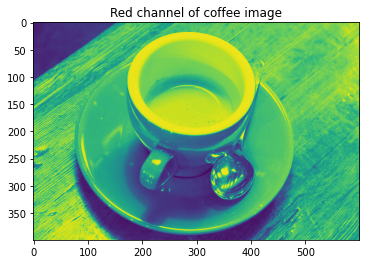

In [7]:
plt.imshow(coffee_image[:,:,0])
plt.title("Red channel of coffee image")
plt.show()

```
coffee_image2=coffee_image.copy()
coffee_image2[200:1200, 200:1200, :] = [0,1,0]
plt.imshow(coffee_image2)
plt.show()

# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show()
```

In [16]:
coffee_image.shape

(400, 600, 3)

#### Set green rectangle:

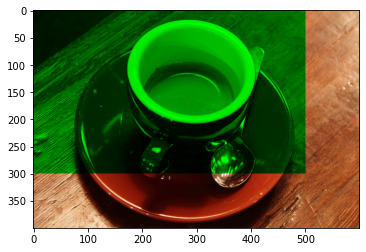

In [25]:
coffee_image2=coffee_image.copy()
# Set the red channel in this part of the image to 1
coffee_image2[:-100, :-100, 0] = 0

# Set the green channel in this part of the image to 0
#coffee_image2[:100, :100, 1] = 1

# Set the blue channel in this part of the image to 0
coffee_image2[:-100, :-100, 2] = 0

# Visualize the result
plt.imshow(coffee_image2)
plt.show()

### Classifying images
* Over the course of training, the algorithm adjusts its parameters to learn the patterns in the data that distinguish between the different classes. 
* Representing class data: **one-hot-encoding** $\Rightarrow$ mathematically convenient

#### One-hot encoding
* To generate a one-hot encoding of a set of samples, we first generate an array of categories
* We initialize an array of zeroes
* We iterate over the list of labels 
* For each sample, we find the index into the categories array that corresponds to the current sample
* We then set the item in the corresponding row and column to 1 and continue on to the next label, until we have iterated over all labels

In [27]:
labels = ["shoe", "dress", "shoe", "t-shirt", "shoe", "t-shirt", "shoe", "dress"]
categories = np.array(["t-shirt", "dress", "show"])
n_categories = 3
ohe_labels = np.zeros((len(labels), n_categories))
for ii in range(len(labels)):
    jj = np.where(categories == labels[ii])
    ohe_labels[ii, jj] = 1

* We can then use the one-hot encoded array to determine how many predictions were correct
* **`(test * prediction).sum()`**
* Because we use 0s and 1s we can use the above to determine **how many correct classifications we made.**

```
# Calculate the number of correct predictions
number_correct = (test_labels*predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)
```

### Image classification with Keras
* We'll start with a fully-connected network like the ones we constructed in the Deep Learning for Python course.
* To construct our network, we will use **densely connected layers**:
    * Every unit in every layer is connected to all the units in the previous layer
* The first layer in the network is connected to all the pixels in the input image   

```
model = Sequential()
train_data.shape
```
* output: `(50, 28, 28, 1)`
* The training data in this case are images of clothes: 50 samples, each of 28 x 28 pixels, and the 1 corresponds to the fact that the images are grayscale.
* **The model expects samples to be rows in an array, and each column to represent a pixel in the image, so before we fit the model we need to convert the images into a 2-dimensional table using the `reshape` method.**
* `train_data = train_data.reshape((50, 784))`
* `model.fit(train_data, train_labels, validation_split=0.2, epochs=3)`

```
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)
```

# $\star$ Chapter 2: Using Convolutions
Convolutions are the fundamental building blocks of convolutional neural networks. In this chapter, you will be introducted to convolutions and learn how they operate on image data. You will also see how you incorporate convolutions into Keras neural networks.

### Convolutions
* In the neural network that we previously constructed, each unit in the first layer had a weight connecting it separately with every pixel in the image.
* But we know that pixels in most images are not independent from their neightbors

#### Using correlations in images
* **Natural images** contain **spatial correlations**
* For example, pixels along a **contour** or **edge**
* How can we use these correlations?
* Our own visual system uses these correlations, and each nerve cell in the visual areas of our brain respons to oriented edges at a particular location in the visual field

<img src='data/biological_insp.png' width="400" height="200" align="center"/>
* This image depicts a small part of the visual cortex (the black scale bar is 1 millimeter in size)
* Each part of the image responds to some part of the visual field, and to the orientation depicted by the colors on the right.
* Looking for the same feature, such as a particular orientation, in every location in an image is like a mathematical operation called a **convolution**.
* This is the fundamental operation that convolutional neural networks use to process images
* The following array contains an "edge" in the middle, where the values go from zero to one.

In [33]:
array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

* The **kernel** defines the feature that we are looking for.
* In this case, we are looking for a change from small values on the left to large values on the right:

In [34]:
kernel = np.array([-1, 1])

* We start the result as all zeroes:

In [35]:
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* Then, we slide the kernel along the array.
* In each location, we multiple the values in the array with the values in the kernel and sum them up:

```
conv[0] = (kernel * array[0:2]).sum()
conv[1] = (kernel * array[1:3]).sum()
conv[2] = (kernel * array[2:4]).sum()
...
```

In [36]:
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

#### In this example, the array goes between 0 and 1 twice
* In this case, the edges that go from zero to one match the kernel, but the edges from 1 to 0 are the opposite of the kernel
* In these locations, **the convolution becomes negative**.

In [37]:
array = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
kernel = np.array([-1, 1])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()
conv

array([ 0,  1,  0, -1,  0,  1,  0, -1,  0,  0])

* Convolutions of images do the same operation, but in two dimensions
* In this case (below) we convolve the image of a dress with a kernel that matches vertical edges to its left.
<img src='data/vertical_kernel.png' width="400" height="200" align="center"/>
* This means that when we convolve the image with the kernel, the left edge is emphasized
* The right side of the dress is the opposite of this kernel, and the convolution is negative there
<img src='data/vertical_kernel2.png' width="400" height="200" align="center"/>

### Two-dimensional convolution
* First, we create the kernel
* Then, we create the array that will store the results of the convolution
* We iterate over all the locations in the image
* In each location, we select a window that is the size of the kernel
* We multiply that window with the kernel, and then sum it up
* This sum is then entered as the value of the convolved image in that location
* At the end of the loop, the array will contain the results of the convolution

```
kernel = np.array([[-1, 1],
                   [-1, 1]])
conv = np.zeros((27, 27))
for ii in range(27):
    for jj in range(27):
        window = image[ii:ii+2, jj:jj+2]
        conv[ii, jj] = np.sum(window * kernel)
```
* In neural networks, we call the resulting array a **feature map**, because it contains a map of the locations in the image that match the feature represented by this kernel

#### Exercises: Image Convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable `im`, write the operations inside the loop that would execute the convolution with the provided kernel.

```
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)
```

#### Exercises: Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called `convolution()` that takes two inputs: `image` and `kernel` and produces the convolved image. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:

```
np.array([[-1, 1, -1],
          [-1, 1, -1],
          [-1, 1, -1]])
```

Define a kernel that finds horizontal lines in images.

```
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])
```

Define a kernel that finds a light spot surrounded by dark pixels.

```
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])
```

Define a kernel that finds a dark spot surrounded by bright pixels.

```
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])
```

### Implementing convolutions in Keras
* Keras has objects to represent convolution layers

#### Keras Convolution layer
* Here, we have a two-dimensional convolution, that we can use to analyze images

```
from keras.layers import Conv2D
Conv2D(10, kernel_size =3, activation ='relu')
```
* The `Conv2D` layer resembles the "Dense" layers, but instead of having every unit in the layer connected to every unit in the previous layer, these connect to the previous layer through a convolution kernel
* This means that **the output of each unit in this layer is a convolution of a kernel over the image input.**
* Above: 10 convolution units
* During the training of a neural network that has convolutional layers, the kernels in each unit would be adjusted using back-propagation
* The principle is the same as learning in the Dense layers that we have seen so far, but with fewer weights.
    * A Dense layer has one weight for each pixel in the image
* **A convolution layer has only one weight for each pixel in the *kernel.***
    * For example, if we set the `kernel_size` argument to 3, that means that the kernel of each unit has 9 pixels
    * If the layer has 10 units, it would have 90 parameters for these kernels
    
#### Integrating convolution layers into a network

```
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
```
* In addition to the function arguments we've used before (the number of units, the kernel size, the activation function, here we also add the `input_shape`.
    * The **`input_shape`** is the size of each of the input images to the network
    * For example, for the images of clothing we used above, we had `image_rows` and `image_cols` both equal to 28 (because 28 x 28 image)
* In addition to the `Dense` and `Conv2D` layers, we also need a **`Flatten`** layer
    * The **`Flatten`** layer serves as a connector between convolution and densely connected layers
    * This takes the output of the convolution, that we previously referred to as a "feature map," and **it flattens it into a one-dimensional array.**
* Above, the output is one of the three classes of clothing, so there are three units in the Dense output layer (recall that all output layers must be Dense, or fully-connected)
* To classigy among the categories represented by the three units, we use the **`softmax` activation function**.

#### This is a diagram that describes the CNN that we created:
<img src='data/our_cnn.png' width="400" height="200" align="center"/>

* Notice that the `Conv2D` operation goes to 10 feature maps of 28 x 28 pixels each and the `Flatten` operation takes us to 3 units of the output.
* Just like before, the next step is to compile the model:

```
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
```
* Recall that **for classification tasks, `categorical_crossentropy` is an appropriate loss function.**
* Also **note that the `metrics` argument accepts a list.**

```
train_data.shape
```
* output: `(50, 28, 28, 1)`
* Represents 50 samples of 28 x 28 images in grayscale
* When we trained on a fully-connected network, composed entirely of densely-connected layers, we had to reshape this input before feeding it to the network
* **Here, however, we would like the pixels to retain their spatial relationships, so we don't do that.**
    * (That is why we had to specify the input shape when we defined the convolutional layer

```
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)
model.evaluate(test_data, test_labels, epochs=3)
```

#### Exercises: Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (`Dense`) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.

```
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))
```

#### Exercises: Training a CNN to classify clothing types
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

The Conv2D `model` you built in the previous exercise is available in your workspace.

```
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)
```

#### Exercises: Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. The `model` you fit in the previous exercise is available in your workspace.

```
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)
```

### Tweaking your convolutions
#### Convolution with zero-padding
* When the input image is zero-padded, the output feature map can have the same size as the input (or at least closer to the same size than convolution performed without zero-padding)
* This can be especially useful if you want to build a network that has many layers 

#### Zero padding in Keras
* To implement zero-padding in Keras, we will use the `Conv2D` object's **`padding`** keyword argument:

#### No padding:
```
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='valid')
```
* If we provide the keyword **`'valid'`**, no zero padding is added 
    * **This is also the default behavior**
    
#### With padding:
* If we provide the value **`'same'`**, zero padding will be applied to the input to this layer **so that the output of the convolution has the same size as the input into the convolution.**

```
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='same')
```

#### Strides
* Another factor that affects the size of the output of a convolution is **the size of the step that we take with the kernel between input pixels**, called the size of the **stride**.
* A larger stride (anything larger than 1) also causes an output size to be smaller than the input size
* Default is `stride = 1`

```
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), strides=1)
```

<img src='data/calculating_output_size.png' width="400" height="200" align="center"/>

### Dilated convolutions
* Finally, you can also tweak thr spacing between the pixels affected by the kernel
* This is called a **dilated convolution**
* This is useful in cases where you need to aggregate information across multiple scales
* This is controlled through the keyword argument **`'dilation_rate'`** that sets the distance between subsequent pixels 
* **Default is 1**

```
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), dilation_rate=2)
```

#### ExercisesAdd padding to a CNN
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

```
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```

#### Exercises: Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

```
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```

#### Exercises: Calculate the size of convolutional layer output
Zero padding and strides affect the size of the output of a convolution.

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?

((256-4+2)/2)+1 = **128** Or, **128 x 128**

In [42]:
((256-4+2)/2)+1

128.0

# $\star$ Chapter 3: Going Deeper
Convolutional neural networks gain a lot of power when they are constructed with multiple layers (deep networks). In this chapter, you will learn how to stack multiple convolutional layers into a deep network. You will also learn how to keep track of the number of parameters, as the network grows, and how to control this number.

* One of the major strengths of convolutional neural networks comes from building networks with multiple layers of convolutional filters
* **This is why using artifical neural networks is sometimes also called "deep learning".**

#### Network with one convolutional layer: implementation
* The code for this model is directly below the image:
<img src='data/our_cnn.png' width="400" height="200" align="center"/>

```
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```

<img src='data/deeper_cnn.png' width="400" height="200" align="center"/>
* In this second diagram, we have added one more convolutional layer
* This second Conv2D layer also has 10 feature maps
* Instead of operating directly on the image, the convolutions in this layer operate on each of the feature maps in the first convolutional later

```
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1), padding='equal'))
# Second convolutional layer
model.add(Conv2D(10, kernel_size=2, activation='relu')
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```
* Because the second convolutional layer recieves its inputs from the first convolutional layer, it doesn't require the `input_shape` keyword argument to be provided.

#### Why do we want to add additional layers to a network?
* This is again motivated by our own visual system, which has multiple layers of processing in it.
* Below is the architecture of a network developed by Google researchers in 2014
* It has 22 layers of convolutions and some other kinds of layers, like pooling layers

<img src='data/deeper_network.png' width="800" height="500" align="center"/>
* One way to understand why we would want a network this deep is by looking at the kinds of things that the kernels and feature maps in the different layers tend to respond to.

#### Features in early layers:
* For example, these are the kinds of things that layers in the early part of the network tend to respond to:
    * **Oriented lines**
    * **Simple textures**    
<img src='data/early_layer_features.png' width="400" height="200" align="center"/>

#### Features in intermediate layers
* Intermediate layers of the network tend to respond to **more complex features, that include simple objects, such as eyes.**
<img src='data/intermediate_layer_features.png' width="400" height="200" align="center"/>

#### Features in late layers
* In the higher layers of the network, the feature maps tend to extract specific types of objects
* This allows the fully-connected layers at the top of the network to extract useful information for object classification basied on the responses of each of these layers
<img src='data/late_layer_features.png' width="400" height="200" align="center"/>

* In other words, having multiple layers of convolutions in the network allows the network to gradually build up representations of objects in the images from simple features to more complex features and even acquire sensitivity to distinct categories of objects

#### How deep?
* Depth comes at a computational cost
* May require more data

#### Exercises: Creating a deep learning network 
A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.

```
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```

#### Exercises: Train a deep CNN to classify clothing images
Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

The `model` you built in the previous exercise is available in your workspace.

```
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)
```

### How many parameters?
* When considering the architecture of networks, it is sometimes useful to think about the number of parameters in the network 
* When you construct a Keras model, **you can get a description of this model by calling the model's summary method:**

```
# Call the summary method
model.summary()
```
<img src='data/model_summary.png' width="400" height="200" align="center"/>

* This tells us that the total number of parameters in the model is `7,993`.

#### Counting parameters

**First layer:** `(784 * 10 + 10) = 7850`
    * 1 parameter for every pixel in the image (784)
    * Times the number of units in this layer (10)
    * Plus 10 parameters for 1 single bias term in each of the ten units 
    
**Second layer:** `(10 * 10 + 10)`
    * 1 parameter for every unit in layer 1; input = 10 units (10)
    * Times the number of units in this layer (10)
    * Plus 10 parameters for bias terms 
    
**Third layer:** `(10 * 3 + 3)`

### The number of parameters in a CNN
* What does this look like for a convolutional network with a similar number of units?
* If we implement a CNN with the same number of layers and units as our densely-connected network above, and then print its summary, we get:

<img src='data/cnn_model_summary.png' width="400" height="200" align="center"/>   

* The number of parameters of the similarly-constructed CNN is `24,533`.

**First layer:** `(9 * 10 + 10) = 100`
    * 10 kernels with 9 parameters each plus 10 bias terms

**Second layer:** `10 * 9 * 10 + 10 = 910`
    * In the second layer, each unit is connected through a convolutional kernel to each feature map in the first layer 
    
**Flatten layer:** 0 parameters = `0`
    * Simply takes the output from the feature maps in layer 2 and flattens them into one big array
    
**Third layer:**
    * Because there is zero padding here, the convolutions leave the same number of pixels in each subsequent layer
    * So, we end up with 28 pixels x 28 pixels in each feature map, with 10 feature maps or `7840` pixels in total 
    * This (7840) times 3 units in the last layer is 23520 + 3 bias terms is `23523`
    

* **100 + 910 + 0 + 23523 = 24533**
* So, **convolutional layers don't necessarily reduce the number of parameters.**
* One way to think about this is that the convolutions have more expressive power, so they require less parameters, but reading out these more expressive representations then requires many more parameters on the output side.

#### Exercises: How many parameters in a CNN?

We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?

**ANSWER: 15,782**

#### Exercises How many parameters in a deep CNN?
In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.

We have already provided code that builds a deep CNN for you.

```
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()
```

### Reducing parameters with pooling
* One of the challenges in fitting neural networks is the large number of parameters
* One way to mitigate this is to summarize the output of convolutional layers in a concise manner.
* To do this, we can use **pooling operations**.
* For example, we may summarize a group of pixels based on its maximal value (**max pooling**)
<img src='data/max_pooling.png' width="400" height="200" align="center"/>
<img src='data/max_pooling2.png' width="400" height="200" align="center"/>

#### Implementing max pooling
* We start by allocating the output
* This has half as may pixels on each dimension as the input
* We start from the first coordinate in the output, calculating the maximum of the image in the first two coordinates on each dimension of the input
* Next, we slide along the window by 2 pixels along the first dimension, calculating the maximum for this window
* We keep going like that until we are done with the first row in the input 
* We then move the window to the beginning of the second row in the input, calculating the maximum for the coordinates in the third and fourth rows in the input for this location
* We continue sliding the window along 
* Ultimately, in each location in the output, we calculate the maximum for a window of 2 x 2 pixels at the corresponding location in the input

```
result = np.zeros((im.shape[0]//2, im.shape[1]/2))
result[0, 0] = np.max(im[0:2, 0:2])
result[0, 1] = np.max(im[0:2, 2:4])
result[0, 2] = np.max(im[0:2, 4:6])
```
...

```
result[1, 0] = np.max(im[2:4, 0:2])
result[1, 1] = np.max(im[2:4, 2:4])
```

#### Implementing max pooling
* Another way of implementing this operation is with a loop:

```
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])
```
* In each iteration, we first select the corresponding rows: from the current row in the output, index `ii`, times two, and until 2 pixels beyond that.
* The same for the inner loop on the column index `jj`
* This performs the same operation that we previously broke down row by row

### Max pooling in Keras
* We can integrate max pooling operations into a Keras CNN using the `MaxPool2D` object
* Start off by building a CNN just like before 
* **But, after each convolutional layer, we'll add a pooling layer.**
* The input to the `MaxPool2D` object, two in this case, is the size of the pooling window
    * That means that here pooling will take the max over a window of 2 x 2 pixels from the input for each location in the output.
* We add a second convolutional layer, followed by another maxpooling layer
* The summarization part of the network is the same as before; the flattening layer, followed by a dense layer with softmax activation

```
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model = Sequential()
model.add(Conv2D(5, kernel_size =3, activation = 'relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
```
* How does this affect the number of parameters?
<img src='data/model_summary3.png' width="400" height="200" align="center"/>

* We can see that using the pooling operation dramatically reduces the number of parameters in the model
* Instead of more than 30,000 parameters that this model had with no pooling operations, we now have less than 2,000 parameters
* There are also trade-off to reducing the number of parameters.

#### Exercises: Keras pooling layers
Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:

#### Convolution => Convolution => Flatten => Dense

However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

#### Convolution => Max pooling => Convolution => Flatten => Dense

A Sequential `model` along with `Dense`, `Conv2D`, `Flatten`, and `MaxPool2D` objects are available in your workspace.

```
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size = 2, activation = 'relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, validation_split=0.2, batch_size=10, epochs=3)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)
```

# $\star$ Chapter 4: Understanding and Improving Deep Convolutional Networks
There are many ways to improve training by neural networks. In this chapter, we will focus on our ability to track how well a network is doing, and explore approaches towards improving convolutional neural networks.

### Tracking learning
* During learning, the weights used by the network change, and as they change, the network becomes more attuned to the features of the imgaes that discriminate between classes (meaning that **the loss function we use for training becomes smaller and smaller**).
* Looking at the change in loss with learning can be helpful to see whether learning is progressing as expected, and whether the network has learned enough
* As long as learning is progressing well, we might expect the loss function to keep going down 
* Typically, the loss rapidly decreases in the first few epochs of training, after which learning slows down
    * The loss will continue to go down on the training set even as/if the model begins to overfit.
* If we also consider the validation loss, however, we can see that learning is progressing to some level of loss and then flattens out.
<img src='data/learning_validation.png' width="400" height="200" align="center"/>

* When validated against a separate set of data, loss cannot become better 
* In fact, if we keep training for many epochs, the validation accuracy can start increasing back up again
<img src='data/overfitting_cnn.png' width="400" height="200" align="center"/>

* This is a sign that we have passed the point at which the model weights are being adjusted in a useful way, and we are starting to over-fit to the specifics of the training data.

#### Tracking learning
* To generate these curves, we need a model like the ones that we've created before. 
* We capture the results of fitting out model into a `training` variable, which has a dictionary that stores the learning curves:

```
import matplotlib.pyplot as plt
training = model.fit(train_data, train_labels, epochs=3, validation_split=0.2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()
```

### Storing the optimal parameters
* How do we use the best parameters before the network starts overfitting?
* Answer: By using the `callbacks` module from `Keras` which contains functions that can be executed at the end of each training epoch
* One of these callbacks is a `ModelCheckpoint` object that can be used to store the weights of a network at the end of each epoch of learning
* When it is initialized, an hdf5 file is created
* The callback monitors the validation loss, and will only overwrite the weights whenever the validation loss shows improvement (that is, the validation loss decreases)
* This means that if the network overfits, the weights will be stored for the epoch at which the validation loss was the smallest, before it started rising back up 
* **The `checkpoint` object is stored in a list and passed as input to the model-fitting procedure**

```
from keras.callbacks import ModelCheckpoint

# This checkpoint object will store the model parameters in the file "weights.hdf5

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only= True)

# Store in a list to be used during training
callbacks_list = [checkpoint]

# Fit the model on a training set, using the checkpoint as a callback
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, callbacks=callbacks_list)
```
* After all epochs of fitting are done, this file contains the best weights

#### Loading stored parameters
* To use these weights, we'll need to initialize the model again with the same architecture, the same layers, and with the same number of units in each layer
* We can **then** use the model's `load_weights()` method to bring the model weights back to their value when the model was at its best during training
* We can use the weights in various ways, for example to predict the classes of a separate test image data set, using the `predict_classes()`

```
model.load_weights('weights.hdf5')
model.predict_classes(test_data)
array([2, 2, 1, 2, 0, 1, 0, 1, 2, 0])
```
* **Each entry in the result is the column corresponding to the clothing article in the one-hot-encoded array**

#### Exercises: Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

```
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size = 10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()
```

#### Exercises: Using stored weights to predict in a test set
Model weights stored in an `hdf5` file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. `test_data`).

```
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])
```

### Neural network regularization
* How do we prevent over-fitting and make the best out of our training data?
* One effective strategy: **regularization**
* Here, we'll discuss two strategies for regularization of CNNs
    * 1) **Dropout**
    
#### Dropout
* In each learning step:
    * Select a subset of the units in a layer
    * Ignore it in the forward pass
    * This group of units is ignored both on the forward pass as well as in the back-propagation of error
<img src='data/dropout.png' width="400" height="200" align="center"/>

* The concept of dropout was introduced in 2014 by Nitish Srivastava and his colleagues
* The image on the right illustrates the cnn after dropout was applied **during one step of training**
* Although strange, this regularization strategy can work really well.
* This is because **it allows us train many different networks on different parts of the data**
* Each time the network that is trained is randomly chosen from the full network
* This way, **if part of the network becomes too sensitive to some noise in the data, other parts will compensate for this, because they haven't seen the samples with this noise**
    * ? Maybe similar to Random Forests in this way? Incorrect noise cancels each other out??
* **Dropout also helps prevent different units in the network from becoming overly correlated in their activity**
* **In Keras, dropout is implemented as a layer.**

#### Dropout in Keras
* When we construct the network, we add a Dropout layer after the layer for which we want units ignored.

```
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
```

<img src='data/building.png' width="400" height="200" align="center"/>